In [6]:
# Dampened/Undampened System plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math 
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

%matplotlib notebook

In [2]:
def displacement(x, t):
    

In [4]:
def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)
 
    return f(red), f(green), f(blue)

<IPython.core.display.Javascript object>


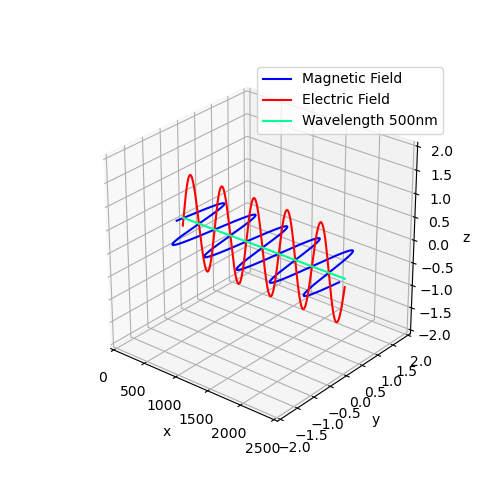

done


In [7]:

fig = plt.figure()
fig.set_size_inches(5,5)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zeros = np.zeros(1000)
twoPi = math.pi * 2
Lambda = 500

frequency = twoPi/Lambda

amplitude = 1
timescale = 0.3

color = wave2rgb(Lambda)

xLimit = 5 * Lambda
xline = np.linspace(0, xLimit, 1000)

def animate_points3d(i):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim3d(0, xLimit)
    ax.set_ylim3d(-2* amplitude, 2* amplitude)
    ax.set_zlim3d(-2* amplitude, 2* amplitude)
    
    zlineMagnetism = zeros
    ylineMagnetism = amplitude * np.cos(xline * (frequency) + (i * timescale))
    
    zlineElectric = amplitude * np.cos(xline * (frequency) + (i * timescale))
    ylineElectric = zeros
    
    ax.plot3D(xline, ylineMagnetism, zlineMagnetism, color="blue", label="Magnetic Field")
    ax.plot3D(xline, ylineElectric, zlineElectric, color="red", label="Electric Field")
    ax.plot3D(xline, zeros, zeros, color=color, label="Wavelength " + str(Lambda) + "nm")
    ax.legend()


ani3d = FuncAnimation(fig, animate_points3d, frames= 120, interval=500, repeat=True)

# ani3d.save("electromagnetism.gif", dpi=300, writer=PillowWriter(fps=120))
plt.show()
print("done")

In [7]:
dx=0.1 #space increment
dt=0.05 #time increment
tmin=0.0 #initial time
tmax=2.0 #simulate until
xmin=-5.0 #left bound
xmax=5.0 #right bound...assume packet never reaches boundary
c=1.0 #speed of sound
rsq=(c*dt/dx)**2 #appears in finite diff sol

nx = int((xmax-xmin)/dx) + 1 #number of points on x grid
nt = int((tmax-tmin)/dt) + 2 #number of points on t grid
u = np.zeros((nt,nx)) #solution to WE

#set initial pulse shape
def init_fn(x):
    val = np.exp(-(x**2)/0.25)
    if val<.001:
        return 0.0
    else:
        return val

for a in range(0,nx):
    u[0,a]=init_fn(xmin+a*dx)
    u[1,a]=u[0,a]

#simulate dynamics
for t in range(1,nt-1):
    for a in range(1,nx-1):
        u[t+1,a] = 2*(1-rsq)*u[t,a]-u[t-1,a]+rsq*(u[t,a-1]+u[t,a+1])
        
fig = plt.figure()
plts = []             # get ready to populate this list the Line artists to be plotted
plt.hold("off")
for i in range(nt):
    p, = plt.plot(u[i,:], 'k')   # this is how you'd plot a single line...
    plts.append( [p] )           # ... but save the line artist for the animation
ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)   # run the animation
ani.save('wave.mp4')    # optionally save it to a file

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

<Figure size 432x288 with 0 Axes>